#### Сгенерирую данные (нормальное распределение) для проверки на нормальность

In [31]:
# Генерация данных

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
sample = np.random.normal(loc=100, scale=15, size=100)

print(f"Среднее: {np.mean(sample):.2f}, Стандартное отклонение: {np.std(sample):.2f}")

Среднее: 98.44, Стандартное отклонение: 13.55


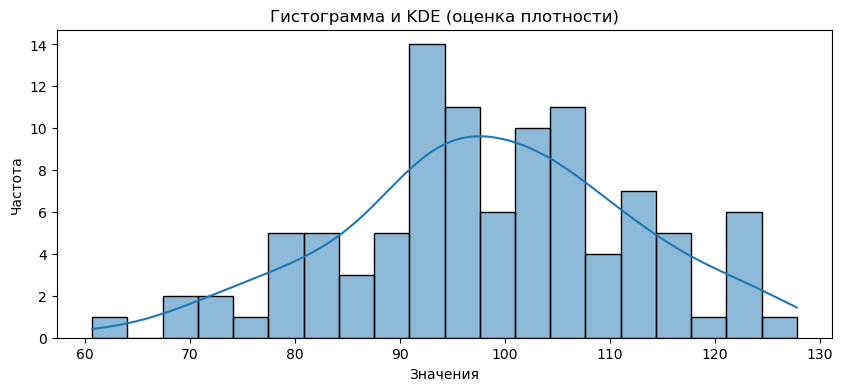

In [32]:
# Визуализация распределения

plt.figure(figsize=(10, 4))
sns.histplot(sample, kde=True, bins=20)
plt.title("Гистограмма и KDE (оценка плотности)")
plt.xlabel("Значения")
plt.ylabel("Частота")
plt.show()

In [33]:
# Shapiro-Wilk Test

from scipy.stats import shapiro

stat, p = shapiro(sample)
print(f"Shapiro-Wilk: p = {p:.4f} {'Нормальное распределение' if p > 0.05 else 'НЕ нормальное распределение'}")

Shapiro-Wilk: p = 0.6552 Нормальное распределение


In [34]:
stat

0.9898831844329834

In [35]:
# Kolmogorov-Smirnov Test

from scipy.stats import kstest

# Нужно нормализовать под стандартное нормальное распределение
sample_std = (sample - np.mean(sample)) / np.std(sample)
stat, p = kstest(sample_std, 'norm')
print(f"Kolmogorov-Smirnov: p = {p:.4f} {'Нормальное распределение' if p > 0.05 else 'НЕ нормальное распределение'}")

Kolmogorov-Smirnov: p = 0.9467 Нормальное распределение


In [36]:
stat

0.050829134224114836

In [37]:
# Anderson-Darling Test

from scipy.stats import anderson

result = anderson(sample, dist='norm')
print("Anderson-Darling:", f"stat = {result.statistic:.4f}")
for cv, sig in zip(result.critical_values, result.significance_level):
    print(f"  Уровень значимости {sig}%: критическое значение = {cv:.4f} => {'Нормальное распределение' if result.statistic < cv else 'НЕ нормальное распределение'}")

Anderson-Darling: stat = 0.2534
  Уровень значимости 15.0%: критическое значение = 0.5550 => Нормальное распределение
  Уровень значимости 10.0%: критическое значение = 0.6320 => Нормальное распределение
  Уровень значимости 5.0%: критическое значение = 0.7590 => Нормальное распределение
  Уровень значимости 2.5%: критическое значение = 0.8850 => Нормальное распределение
  Уровень значимости 1.0%: критическое значение = 1.0530 => Нормальное распределение


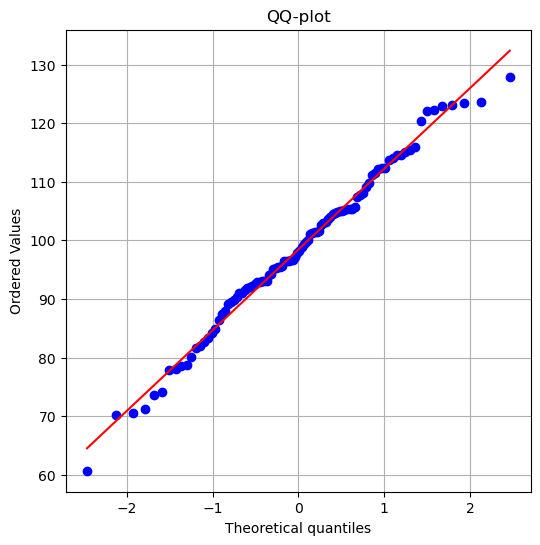

In [38]:
# QQ-plot 
import scipy.stats as stats

plt.figure(figsize=(6, 6))
stats.probplot(sample, dist="norm", plot=plt)
plt.title("QQ-plot")
plt.grid()
plt.show()

На графике QQ-plot видно, что распределение нормальное (большинство точек лежат на прямой)

#### Далее сгенерирую экспоненциальное распределение для проверки на нормальность

In [39]:
# Сгенерируем экспоненциальное распределение, 
# которое скошено вправо и точно не является нормальным

import numpy as np

np.random.seed(42)

# Генерация ненормальных данных (экспоненциальное распределение)
sample = np.random.exponential(scale=1.0, size=100)

print(f"Среднее: {np.mean(sample):.2f}, Стандартное отклонение: {np.std(sample):.2f}")

Среднее: 0.91, Стандартное отклонение: 0.92


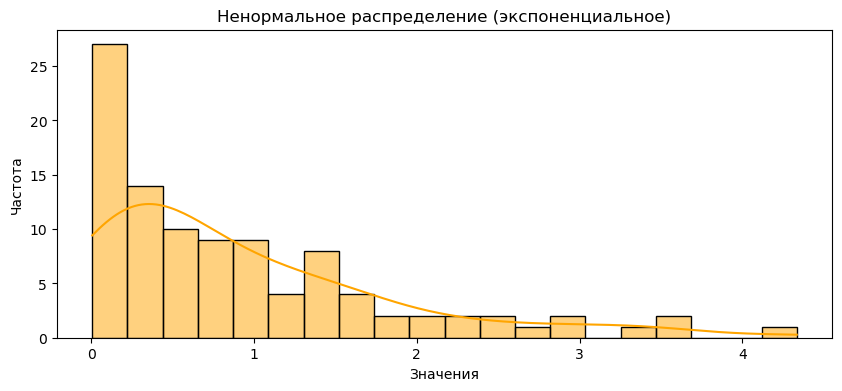

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.histplot(sample, kde=True, bins=20, color='orange')
plt.title("Ненормальное распределение (экспоненциальное)")
plt.xlabel("Значения")
plt.ylabel("Частота")
plt.show()

In [41]:
from scipy.stats import shapiro, kstest, anderson

# Shapiro-Wilk
stat_shapiro, p_shapiro = shapiro(sample)
print(f"Shapiro-Wilk: stat = {stat_shapiro:.4f}, p = {p_shapiro:.4f}, {'распределение НЕ нормальное' if p_shapiro < 0.05 else 'распределение нормальное'}")

# Kolmogorov-Smirnov (стандартизованная выборка)
sample_std = (sample - np.mean(sample)) / np.std(sample)
stat_ks, p_ks = kstest(sample_std, 'norm')
print(f"Kolmogorov-Smirnov: stat = {stat_ks:.4f}, p = {p_ks:.4f}, {'распределение НЕ нормальное' if p_ks < 0.05 else 'распределение нормальное'}")

# Anderson-Darling
result_ad = anderson(sample, dist='norm')
print(f"Anderson-Darling: stat = {result_ad.statistic:.4f}")
for cv, sig in zip(result_ad.critical_values, result_ad.significance_level):
    print(f"  {sig}%: критическое значение = {cv:.4f}, {'распределение НЕ нормальное' if result_ad.statistic > cv else 'распределение нормальное'}")

Shapiro-Wilk: stat = 0.8360, p = 0.0000, распределение НЕ нормальное
Kolmogorov-Smirnov: stat = 0.1602, p = 0.0104, распределение НЕ нормальное
Anderson-Darling: stat = 4.8858
  15.0%: критическое значение = 0.5550, распределение НЕ нормальное
  10.0%: критическое значение = 0.6320, распределение НЕ нормальное
  5.0%: критическое значение = 0.7590, распределение НЕ нормальное
  2.5%: критическое значение = 0.8850, распределение НЕ нормальное
  1.0%: критическое значение = 1.0530, распределение НЕ нормальное


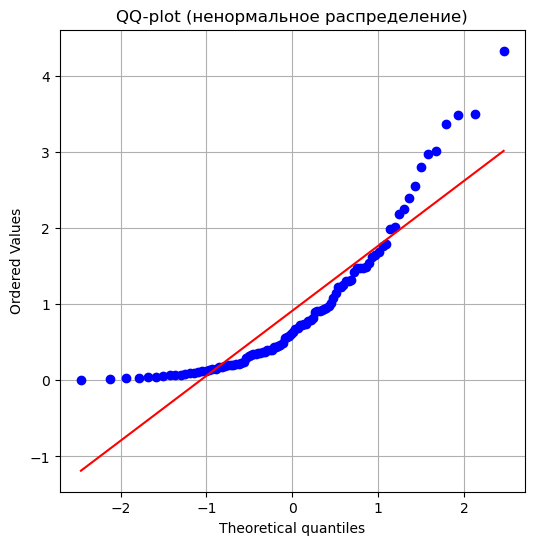

In [42]:
# QQ plot

import scipy.stats as stats

plt.figure(figsize=(6, 6))
stats.probplot(sample, dist="norm", plot=plt)
plt.title("QQ-plot (ненормальное распределение)")
plt.grid()
plt.show()

Распределение обладает явной ассиметрией и не является нормальным (точки не лежат на прямой)